In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Gaussian Processes (GPs) are non-parametric models that assume a distribution over functions. This distribution is defined by a mean function and a covariance function, usually set to zero and an RBF (Radial Basis Function) kernel, respectively. As a Bayesian approach, GPs provide both a prediction and an uncertainty measure for that prediction, making GPs particularly useful for tasks requiring uncertainty estimation.

**This notebook aims to achieve the following objectives:**

- Introduce GPs and their mathematical formulation.
- Implement GP regression from scratch using numpy.
- Apply Gaussian Process Regression to a simple regression task with synthetic data.
- Visualize the results and the uncertainty of the model.

Note that this notebook does not cover hyperparameter optimization for GPs.


# Mathematical Background

## Gaussian Process Model
The GP model is defined by the following equation:

$$
f(x) \sim \mathcal{N}(0, K)
$$

where $f(x)$ is the function we want to model, and $K$ is the covariance matrix of the observed data. The covariance matrix is defined by the kernel function, which is a function that measures the similarity between two input vectors.

## Kernel Function

The kernel function is a function that measures the similarity between two input vectors. The most commonly used kernel function is the Radial Basis Function (RBF) kernel, which is defined as:

$$
k(x, x') = \exp\left(-\frac{1}{2\ell^2}|x - x'|_{2}^2\right)
$$

where $x$ and $x'$ are input vectors, and $\ell$ is a hyperparameter that controls the smoothness of the function. On the code, $\ell$ will be sigma. 

## Covariance Matrix

Using the kernel function, we can compute the covariance matrix of the observed data as follows:

$$
K = \begin{bmatrix}
k(x_1, x_1) & k(x_1, x_2) & \cdots & k(x_1, x_n) \\
k(x_2, x_1) & k(x_2, x_2) & \cdots & k(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
k(x_n, x_1) & k(x_n, x_2) & \cdots & k(x_n, x_n)
\end{bmatrix}
$$

## Prediction

Given a new input vector $x_*$, we can predict the output $y_*$ as follows:

$$
y_* = k^T(x_*, X)K^{-1}y
$$

where $X$ is the input matrix of the observed data, $y$ is the output vector of the observed data, and $k(x_*, X)$ is the kernel function between the new input vector and the observed data.


Observing the equation above, we can see that the prediction is a linear combination of the output vector $y$ with weights given by the kernel function between the new input vector and the observed data. Thus, it's just a kernel regression model.


# Python Implementation

In [2]:
# RBF
def rbf(x_train, x_test, sigma=1):
    return np.exp(-np.linalg.norm(x_train-x_test)**2/(2*sigma**2))

In [3]:
# Generating synthetic data
x_train = np.linspace(-5, 5, 100).reshape(-1, 1)
y_train = np.sin(x_train) + np.random.normal(0, 0.1, x_train.shape) 

x_test = np.linspace(-5, 5, 100).reshape(-1, 1)

In [4]:
# Implementing Guassian Process
class GuassianProcess():

    def __init__(self, sigma, kernel=rbf):
        self.kernel = kernel
        self.sigma = sigma
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.K = np.zeros((x_train.shape[0], x_train.shape[0]))
        # Compute the covariance matrix.
        for i in range(x_train.shape[0]):
            for j in range(x_train.shape[0]):
                self.K[i,j] = self.kernel(x_train[i],x_train[j], self.sigma)
        
        self.K_inverse = np.linalg.inv(self.K)
    
    def predict(self, x_test):
        self.x_test = x_test
        self.y_pred = np.zeros(x_test.shape[0])
        
        # Compute the predictions
        for i in range(self.x_test.shape[0]):
            k = np.zeros((self.x_train.shape[0],1))
            for j in range(self.x_train.shape[0]):
                k[j] = self.kernel(self.x_train[j], self.x_test[i], self.sigma)
                self.y_pred[i] = k.T @ self.K_inverse @ self.y_train

In [5]:
# Creating an instance of the Guassian Process
process = GuassianProcess(sigma=0.28) 

# Fitting the model
process.fit(x_train, y_train)

In [6]:
# Making predictions
process.predict(x_test)

In [7]:
# Plotting the results
def plot_gp(process, title="Gaussian Process Regression"):
    sigma = process.sigma
    y_pred = process.y_pred
    x_test = process.x_test

    plt.figure(figsize=(10,5))
    plt.plot(x_test, process.y_pred, 'b-', label='Prediction')
    plt.fill_between(x_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='Confidence interval (95%)')
    plt.scatter(x_train, y_train, c='r', s=10, label='Training data')
    plt.title( title + f' $\ell$={sigma}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

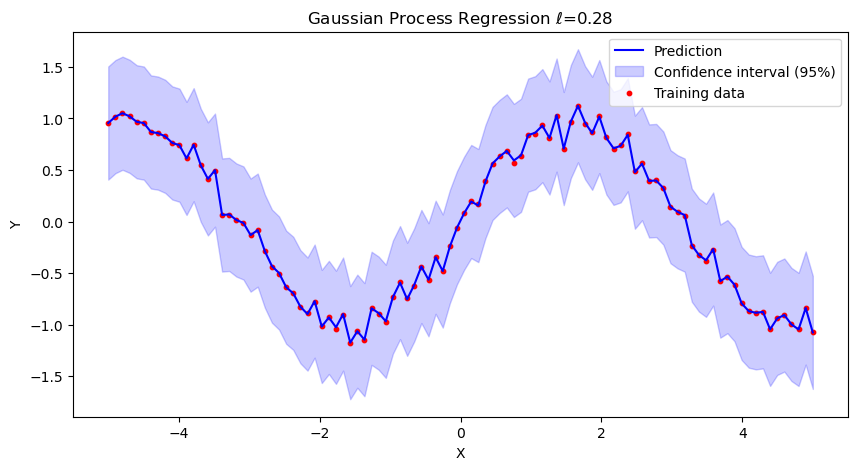

In [8]:
plot_gp(process)

# Conclusion

Gaussian Processes are powerful tools for regression tasks, offering flexibility and a measure of uncertainty, making them valuable for various applications.

# Discussion
In this notebook, I demonstrated how to implement Gaussian Process Regression (GPR) and visualize the results. I generated synthetic data, applied GPR, and plotted the predictions along with confidence intervals. The visualizations show how the model fits the data and the uncertainty associated with the predictions.

This notebook serves as a practical introduction to GPR, showcasing the theoretical concepts and their implementation in Python. It highlights the importance of understanding both the mathematical formulation and the practical considerations when applying GPs to real-world problems.

# Bibliography

Williams, C., & Rasmussen, C. (1995). Gaussian processes for regression. Advances in neural information processing systems, 8.

Schulz, E., Speekenbrink, M., & Krause, A. (2018). A tutorial on Gaussian process regression: Modelling, exploring, and exploiting functions. Journal of Mathematical Psychology, 85, 1-16.

Machine Learning Lecture 26 “Gaussian Processes” -Cornell CS4780 SP17. (n.d.). [Video]. Youtube. https://www.youtube.com/watch?v=R-NUdqxKjos&t=2600s&ab_channel=KilianWeinberger